In [44]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from itertools import chain
from sklearn.model_selection import train_test_split
# importing ploting libraries
from scipy.stats import zscore
from sklearn import metrics
import seaborn as sns

### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [7]:
diab = pd.read_csv("1547351116877_pima-indians-diabetes.csv")

In [ ]:
# Eye ball the imported dataset

### Check dimension of dataset

In [10]:
diab.shape
diab.head()

,preg,plas,Pres,Skin,Test,Mass,Pedi,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check distribution of dependent variable, Outcome and plot it (1 Marks)

0    500
1    268
Name: Class, dtype: int64

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Looks the data is biased towards Non Diabetes


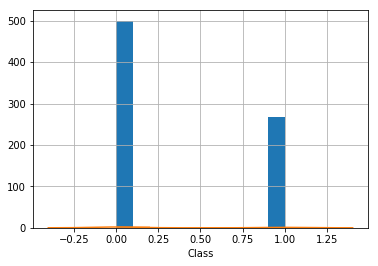

In [25]:
diab["Class"].hist()
diab["Class"].value_counts()




print("Looks the data is biased towards Non Diabetes")

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

### Check data distribution using summary statistics and provide your findings(2 Marks)

preg       int64
plas       int64
Pres       int64
Skin       int64
Test       int64
Mass     float64
Pedi     float64
Age        int64
Class      int64
dtype: object

,preg,plas,Pres,Skin,Test,Mass,Pedi,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3f0048400>,
      dtype=object)

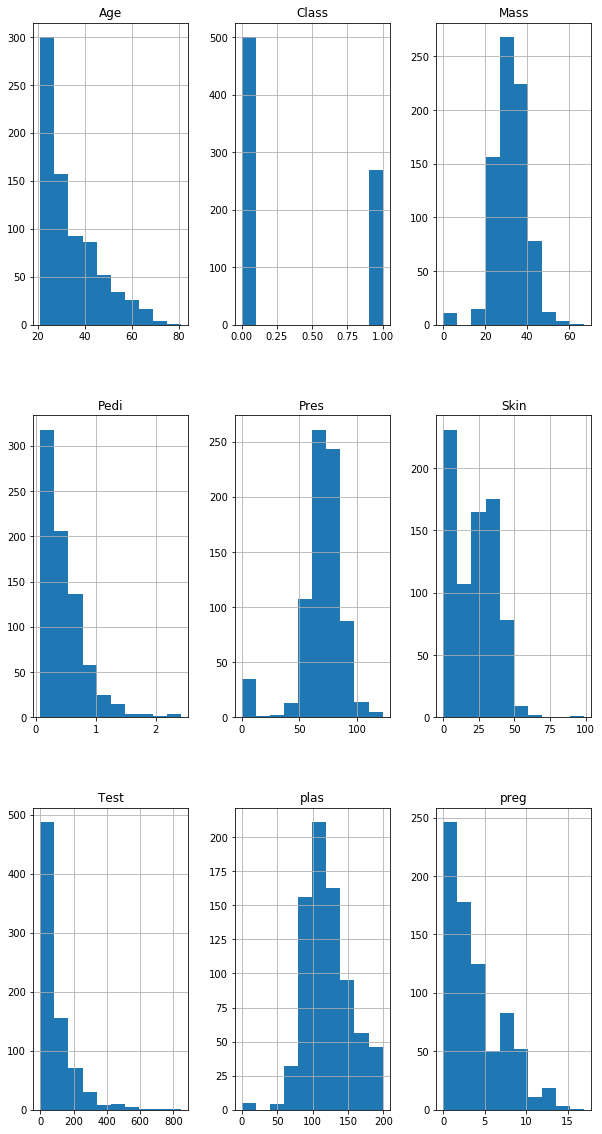

In [30]:
diab.dtypes
diab.describe()
diab.hist(layout = (3,3),figsize = (10,20))


In [31]:
print("Looks Age, Pedi, test, Preg are righly skewed and outliers found, but cant conclude without business interaction")
diab.info()

Looks Age, Pedi, test, Preg are righly skewed and outliers found, but cant conclude without business interaction
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
Pres     768 non-null int64
Skin     768 non-null int64
Test     768 non-null int64
Mass     768 non-null float64
Pedi     768 non-null float64
Age      768 non-null int64
Class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Do correlation analysis and bivariate viualization with Insights(1 Marks)

In [32]:
diab.corr()

,preg,plas,Pres,Skin,Test,Mass,Pedi,Age,Class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [33]:
independent_dependent = diab.corr()["Class"]
independent_independent = diab.drop("Class",axis =1).corr()

In [34]:

print("Finding Correlation between independent vs Dependent")



Finding Correlation between independent vs Dependent


In [36]:
for k in independent_dependent:
    if (-0.1 <= k <= 0.1):
        print ("Independent vs Dependent Weak Correlation found ",k)


Independent vs Dependent Weak Correlation found  0.06506835955033308
Independent vs Dependent Weak Correlation found  0.07475223191831948


In [37]:
print("Looks columns Pres and Skin dosent contribute much for dependent")

Looks columns Pres and Skin dosent contribute much for dependent


In [39]:
for l, l_val in enumerate (independent_independent.columns):
    for k, values in enumerate(independent_independent.iloc[:,l]):
        if values > 0.79:
            print(independent_independent.index[k],"-",l_val,"-", independent_independent.iloc[k,l])
print("we can ignore those with same feature comparision = 1")            
print("Looks independent columns are not that correlated and each feature can be good contributor")

preg - preg - 1.0
plas - plas - 1.0
Pres - Pres - 1.0
Skin - Skin - 1.0
Test - Test - 1.0
Mass - Mass - 1.0
Pedi - Pedi - 1.0
Age - Age - 1.0
we can ignore those with same feature comparision = 1
Looks independent columns are not that correlated and each feature can be good contributor


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


Kernel distribution shows plas,Age,mass helps in identifying the class better


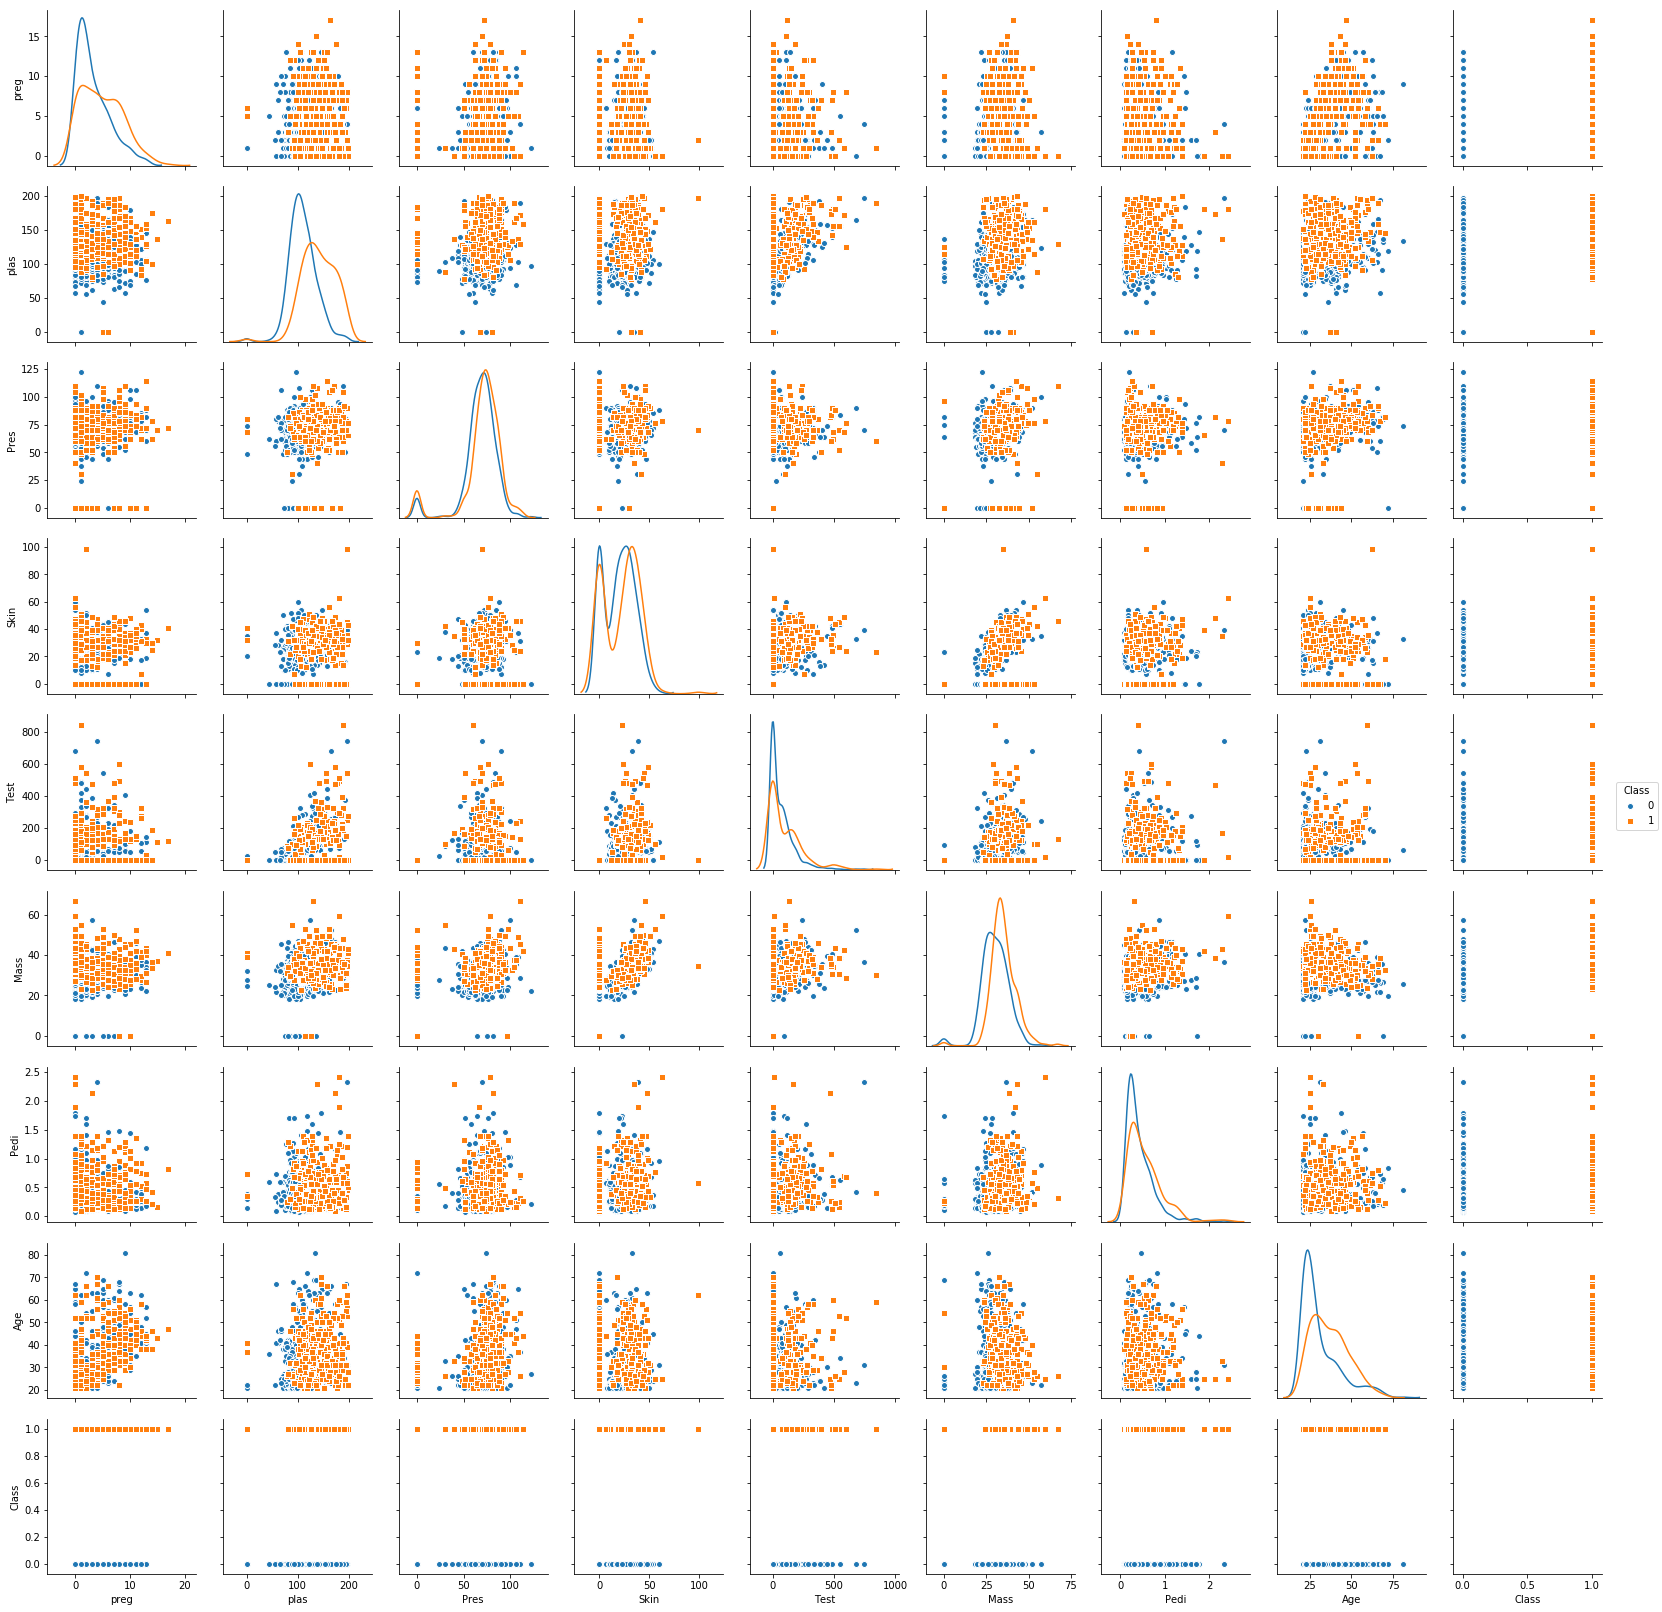

In [41]:
sns.pairplot(diab,hue = 'Class',markers= ["o", "s"],diag_kind = 'kde')
print("Kernel distribution shows plas,Age,mass helps in identifying the class better")

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [100]:
diab_x = diab.drop(labels = ["Class"], axis = 1)
diab_y = diab["Class"]
#diab_x = diab_x.apply(zscore)

In [101]:
X_train,X_test,Y_train,Y_test = train_test_split(diab_x,diab_y,stratify=diab_y,test_size = 0.30)
Xr_train,Xr_test,Yr_train,Yr_test =X_train,X_test,Y_train,Y_test


### Train Support Vector Machine Model(1 Marks)

In [102]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
svc = svm.SVC()
svc.fit(Xr_train,Yr_train)
pr = svc.predict(Xr_test)
svc.score(Xr_test,Yr_test)
conf_mat = confusion_matrix(Yr_test, pr)
conf_mat
Yr_test.value_counts()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.6493506493506493

array([[150,   0],
       [ 81,   0]])

0    150
1     81
Name: Class, dtype: int64

In [87]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
bPrecis, bRecall, bFscore, bSupport = precision_recall_fscore_support(Yr_test, pr,average = 'macro' )
print("Precision ",bPrecis)
print("Recall ",bRecall)
print(classification_report(Yr_test, pr))

Precision  0.3246753246753247
Recall  0.5
             precision    recall  f1-score   support

          0       0.65      1.00      0.79       150
          1       0.00      0.00      0.00        81

avg / total       0.42      0.65      0.51       231



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
# your insights

In [88]:
print("Looks the Accuracy is only 65%, and without scaling Prediction of all Non diabetics are predicted correctly and none of the diabetes are predictred correctly")

Looks the Accuracy is only 65%, and without scaling Prediction of all Non diabetics are predicted correctly and none of the diabetes are predictred correctly


### Scale the data points using MinMaxScaler ( 1 Marks)

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
diab_xm = diab.drop(labels = ["Class"], axis = 1)
diab_ym = diab["Class"]

rescaledX = scaler.fit_transform(diab_xm)

### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [104]:
X_train,X_test,Y_train,Y_test = train_test_split(rescaledX,diab_ym,stratify=diab_ym,test_size = 0.30)

from sklearn import svm
from sklearn.metrics import confusion_matrix
svc = svm.SVC()
svc.fit(X_train,Y_train)
prd = svc.predict(X_test)
svc.score(X_test,Y_test)
conf_mat = confusion_matrix(Y_test, prd)
conf_mat
Y_test.value_counts()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.7662337662337663

array([[143,   7],
       [ 47,  34]])

0    150
1     81
Name: Class, dtype: int64

In [105]:
bPrecis, bRecall, bFscore, bSupport = precision_recall_fscore_support(Yr_test, pr,average = 'macro' )
print("Precision ",bPrecis)
print("Recall ",bRecall)
print(classification_report(Y_test, prd))

Precision  0.3246753246753247
Recall  0.5
             precision    recall  f1-score   support

          0       0.75      0.95      0.84       150
          1       0.83      0.42      0.56        81

avg / total       0.78      0.77      0.74       231



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [107]:
print("Looks the Accuracy is only 77%, but the no. of diabetes not found correctly is high, which can see from recall of class wise metrics")

Looks the Accuracy is only 77%, but the no. of diabetes not found correctly is high, which can see from recall of class wise metrics


#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [111]:
X_train,X_test,Y_train,Y_test = train_test_split(rescaledX,diab_ym,stratify=diab_ym,test_size = 0.30)

from sklearn import svm
from sklearn.metrics import confusion_matrix
svc = svm.SVC(C = 1000)
svc.fit(X_train,Y_train)
prd = svc.predict(X_test)
svc.score(X_test,Y_test)
conf_mat = confusion_matrix(Y_test, prd)
conf_mat
Y_test.value_counts()

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.7705627705627706

array([[130,  20],
       [ 33,  48]])

0    150
1     81
Name: Class, dtype: int64

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [112]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [113]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [114]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [115]:
gs.fit(X_train,Y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [117]:
gs.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [118]:
gs.best_score_ 

0.7690875232774674